### Logistic Regression

### Step 1:Import all the libraries

### Step 2:Load and Review the Data

### Step 3:Explore the Data

### Step 4:Training Data and Testing Data Split

### Step 5: Fit the model with the Training Data

### Step 6:Predict the test data

In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('suv_data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


### Analyse the Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

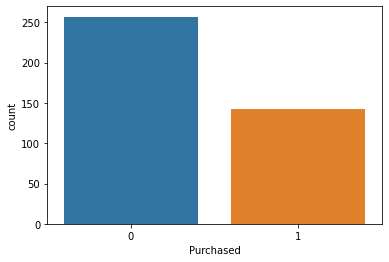

In [9]:
sns.countplot(x="Purchased",data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

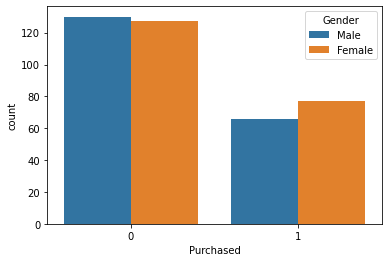

In [11]:
sns.countplot(x="Purchased",hue="Gender",data=df)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='count'>

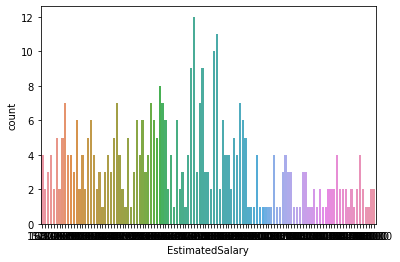

In [12]:
sns.countplot(x="EstimatedSalary",data=df)

### Data Wrangling

In [13]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

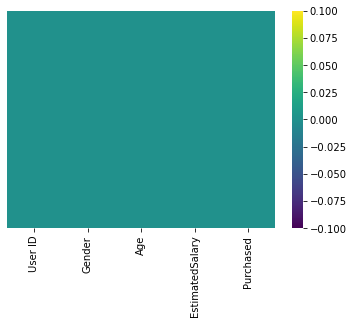

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

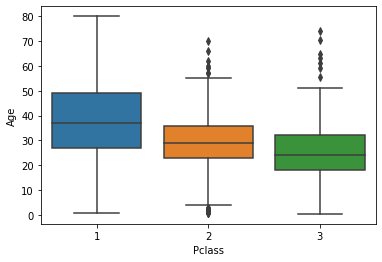

In [14]:
sns.boxplot(x="Pclass",y="Age",data=df) 

In [15]:
df.drop("Cabin",axis=1,inplace=True)

In [16]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.75,Q


In [17]:
df.dropna(inplace=True)

In [15]:
df.shape

(400, 5)

<AxesSubplot:>

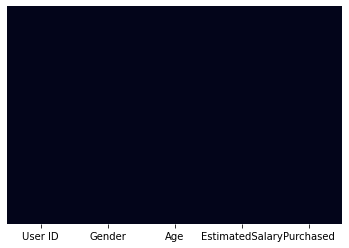

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [17]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
Sex=pd.get_dummies(df["Gender"],drop_first=True)
Sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [24]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [21]:
df=pd.concat([df,Sex],axis=1)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [23]:
df.drop(["Gender"],axis=1,inplace=True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


### Split the Data

In [24]:
X=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

### Fit the Model

In [26]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
predictions=model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7416666666666667

In [29]:
from sklearn import metrics

In [30]:
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.71      0.96      0.82        73
           1       0.86      0.40      0.55        47

    accuracy                           0.74       120
   macro avg       0.79      0.68      0.68       120
weighted avg       0.77      0.74      0.71       120



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[70,  3],
       [28, 19]], dtype=int64)

<AxesSubplot:>

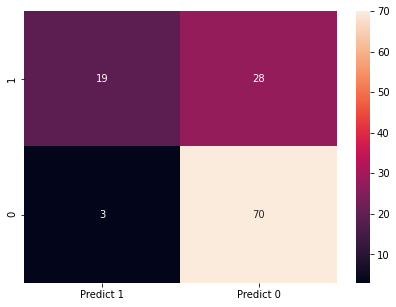

In [32]:

cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

In [39]:
model=LogisticRegression()


In [40]:
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
predictions=model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8583333333333333

<AxesSubplot:>

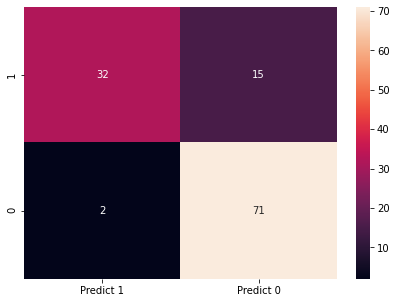

In [43]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [35]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [36]:
accuracy_score(y_test,predictions)

0.7416666666666667